# Doğrusal Olmayan Regreson Modelleri

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

# KNN

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [5]:
knn_model.n_neighbors

5

### Tahmin ve Model Tuning

In [8]:
y_pred = knn_model.predict(X_test)

In [9]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [54]:
r2_score(y_test, y_pred)

0.2093550739421146

In [26]:
param_grid = {'n_neighbors': np.arange(1, 31)}

In [ ]:
grid_search = GridSearchCV(KNeighborsRegressor(),param_grid,cv = 5)
grid_search.fit(X_train, y_train)

In [36]:
print("best n_neighbors: ", grid_search.best_params_["n_neighbors"])

best n_neighbors:  7


In [53]:
knn_model = KNeighborsRegressor(8).fit(X_train, y_train)
knn_model.n_neighbors
y_pred = knn_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_score(y_test, y_pred)

413.7094731463598


0.2093550739421146

## Destek Vektör Regresyonu (SVR)

In [109]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [110]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [111]:
from sklearn.svm import SVR

In [112]:
svr_model = SVR(kernel = "linear").fit(X_train, y_train)

In [113]:
svr_pred = svr_model.predict(X_train)
svr_pred[0:10]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756, 666.91219512, 150.08292683, 304.13780488,
       507.88780488, 815.99756098])

In [114]:
y_pred = svr_model.predict(X_train)

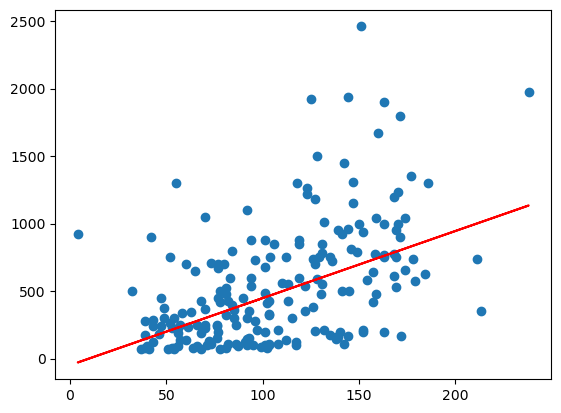

In [115]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color = 'r');

### Tahmin ve Model Tuning

In [116]:
svr_model.predict([[91]])

array([403.52804878])

In [117]:
y_pred = svr_model.predict(X_test)

In [118]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_score(y_test, y_pred)

459.0187960365147


0.026689303489502936

In [102]:
svr_params = {"C": np.arange(0.1, 2, 0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv=10, n_jobs=-1).fit(X_train, y_train)

In [103]:
pd.Series(svr_cv_model.best_params_)[0]

0.4

In [104]:
svr_tuned = SVR(kernel = "linear", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [105]:
y_pred = svr_tuned.predict(X_test)

In [107]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_score(y_test, y_pred)

367.538528365296


0.3759831723320952

## Doğrusal Olmayan SVR

In [119]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [147]:
svr_rbf = SVR(kernel = "rbf").fit(X_train, y_train)

### Tahmin ve Model

In [148]:
y_pred = svr_rbf.predict(X_test)

In [149]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_score(y_test, y_pred)

460.0032657244849


0.02250985629101887

In [150]:
svr_params = {"C": [0.1, 0.4, 5, 10, 20, 30, 40, 50]}
svr_cv_model = GridSearchCV(svr_rbf, svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [151]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [152]:
svr_tuned = SVR(kernel = "rbf", C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [153]:
y_pred = svr_tuned.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_score(y_test, y_pred)

428.00406888095694


0.15377402364911363

## Çok Katmanlı Algılayıcı

In [211]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [212]:
from sklearn.preprocessing import StandardScaler

In [213]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [214]:
from sklearn.neural_network import MLPRegressor

In [215]:
mlp_model = MLPRegressor().fit(X_train_scaler, y_train)

In [216]:
mlp_model.n_layers_ #katman  sayısı

3

In [217]:
mlp_model.hidden_layer_sizes # katmandaki eleman(ağ) sayısı

(100,)

### Tahmin ve Model Tuning

In [218]:
mlp_model.predict(X_train_scaler)[0:5]

array([ 6.49155861, 44.51974886, 28.2735942 ,  3.92895597,  5.36294155])

In [219]:
y_pred = mlp_model.predict(X_test_scaler)

In [229]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_score(y_test, y_pred)

662.358205781994


-1.026639016080519

In [221]:
mlp_params = {'alpha': [0.1,0.01, 0.02, 0.005],
             'hidden_layer_sizes': [(20,20), (100,50,150), (300,200,150)],
             'activation': ['relu', 'logistic']}

In [222]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv=10)

In [223]:
mlp_cv_model.fit(X_train_scaler,y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [224]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (100, 50, 150)}

In [226]:
mlp_tuned = MLPRegressor(alpha=0.02,hidden_layer_sizes=(100,50,150))

In [228]:
mlp_tuned.fit(X_train_scaler, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [231]:
y_pred = mlp_tuned.predict(X_test_scaler)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_score(y_test, y_pred)

355.24002605609337


0.4170459234015028

## Classification and Regression Trees (CART) - Regresyon Ağaçları

In [315]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [233]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [271]:
cart_model = DecisionTreeRegressor()

In [272]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor()

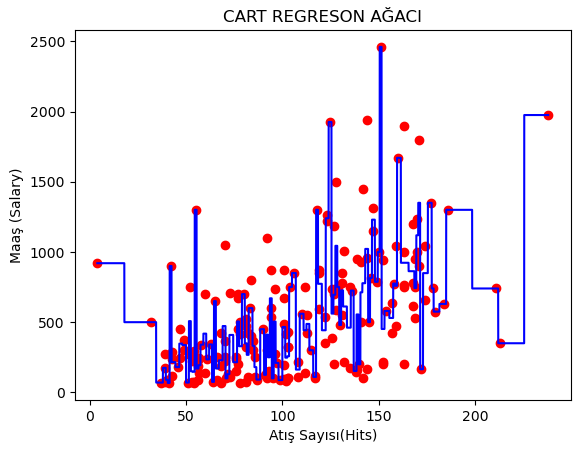

In [273]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [274]:
#!pip install skompiler
#!pip install astor
from skompiler import skompile

In [275]:
print(skompile(cart_model.predict).to('python/code'))

((920.0 if x[0] <= 18.0 else ((500.0 if x[0] <= 34.5 else (70.0 if x[0] <= 
    38.0 else 175.0) if x[0] <= 39.5 else 90.0 if x[0] <= 40.5 else 67.5) if
    x[0] <= 41.5 else 900.0 if x[0] <= 42.5 else (((((215.55566666666664 if
    x[0] <= 44.5 else 180.0) if x[0] <= 46.5 else 347.5 if x[0] <= 48.0 else
    337.5) if x[0] <= 50.0 else 70.0) if x[0] <= 51.5 else 507.5) if x[0] <=
    52.5 else 150.0 if x[0] <= 53.5 else 146.83333333333334) if x[0] <= 
    54.5 else 1300.0 if x[0] <= 55.5 else (170.0 if x[0] <= 56.5 else 
    193.75) if x[0] <= 57.5 else ((((((340.0 if x[0] <= 59.0 else 418.5) if
    x[0] <= 60.5 else 235.0 if x[0] <= 62.0 else 341.667) if x[0] <= 63.5 else
    75.0) if x[0] <= 64.5 else 650.0) if x[0] <= 65.5 else 170.0 if x[0] <=
    67.0 else 228.66666666666666) if x[0] <= 69.0 else 472.5) if x[0] <= 
    70.5 else (100.0 if x[0] <= 71.5 else 130.0) if x[0] <= 72.5 else 
    409.1665 if x[0] <= 74.5 else 215.0) if x[0] <= 76.5 else (((505.0 if x
    [0] <= 77.5 else 

### Tahmin ve Model Tuning

In [276]:
x = [91]
((920.0 if x[0] <= 18.0 else ((500.0 if x[0] <= 34.5 else (70.0 if x[0] <= 
    38.0 else 175.0) if x[0] <= 39.5 else 90.0 if x[0] <= 40.5 else 67.5) if
    x[0] <= 41.5 else 900.0 if x[0] <= 42.5 else (((((215.55566666666664 if
    x[0] <= 44.5 else 180.0) if x[0] <= 46.5 else 347.5 if x[0] <= 48.0 else
    337.5) if x[0] <= 50.0 else 70.0) if x[0] <= 51.5 else 507.5) if x[0] <=
    52.5 else 150.0 if x[0] <= 53.5 else 146.83333333333334) if x[0] <= 
    54.5 else 1300.0 if x[0] <= 55.5 else (170.0 if x[0] <= 56.5 else 
    193.75) if x[0] <= 57.5 else ((((((340.0 if x[0] <= 59.0 else 418.5) if
    x[0] <= 60.5 else 235.0 if x[0] <= 62.0 else 341.667) if x[0] <= 63.5 else
    75.0) if x[0] <= 64.5 else 650.0) if x[0] <= 65.5 else 170.0 if x[0] <=
    67.0 else 228.66666666666666) if x[0] <= 69.0 else 472.5) if x[0] <= 
    70.5 else (100.0 if x[0] <= 71.5 else 130.0) if x[0] <= 72.5 else 
    409.1665 if x[0] <= 74.5 else 215.0) if x[0] <= 76.5 else (((505.0 if x
    [0] <= 77.5 else ((((328.88899999999995 if x[0] <= 79.0 else 700.0) if 
    x[0] <= 80.5 else 348.75 if x[0] <= 81.5 else 267.5) if x[0] <= 82.5 else
    600.0 if x[0] <= 83.5 else 600.0) if x[0] <= 84.5 else (331.25 if x[0] <=
    85.5 else (180.0 if x[0] <= 86.5 else 91.5) if x[0] <= 88.5 else 450.0 if
    x[0] <= 90.5 else 125.0) if x[0] <= 91.5 else 411.25 if x[0] <= 92.5 else
    250.0) if x[0] <= 93.5 else 670.0 if x[0] <= 94.5 else ((100.0 if x[0] <=
    95.5 else 504.1665) if x[0] <= 96.5 else 210.0 if x[0] <= 98.0 else 
    87.5) if x[0] <= 100.0 else 466.0) if x[0] <= 101.5 else 247.5 if x[0] <=
    102.5 else 257.3334) if x[0] <= 103.5 else (750.0 if x[0] <= 105.0 else
    850.0) if x[0] <= 107.0 else 162.5 if x[0] <= 109.0 else (560.0 if x[0] <=
    111.0 else 442.5 if x[0] <= 112.5 else 487.5) if x[0] <= 114.0 else 
    300.0) if x[0] <= 116.0 else 110.0) if x[0] <= 117.5 else ((((1300.0 if
    x[0] <= 118.5 else 773.3333333333334 if x[0] <= 120.5 else 442.5) if x[
    0] <= 122.5 else 1240.0 if x[0] <= 124.0 else 1925.571) if x[0] <= 
    125.5 else (561.25 if x[0] <= 126.5 else (695.2776666666667 if x[0] <= 
    127.5 else 1043.75) if x[0] <= 128.5 else (750.0 if x[0] <= 129.5 else 
    480.0) if x[0] <= 130.5 else 726.6666666666666) if x[0] <= 131.5 else (
    ((611.6665 if x[0] <= 133.5 else 461.0) if x[0] <= 135.5 else 725.0) if
    x[0] <= 137.0 else 152.5 if x[0] <= 138.5 else 555.0 if x[0] <= 139.5 else
    200.0) if x[0] <= 140.5 else 712.5 if x[0] <= 141.5 else 777.5) if x[0] <=
    143.0 else (((1021.6666666666666 if x[0] <= 144.5 else 500.0 if x[0] <=
    145.5 else 815.0) if x[0] <= 146.5 else 1230.0 if x[0] <= 148.0 else 
    787.5 if x[0] <= 149.5 else 1000.0) if x[0] <= 150.5 else 2460.0) if x[
    0] <= 151.5 else (451.6666666666667 if x[0] <= 153.0 else 580.0 if x[0] <=
    155.5 else 530.0) if x[0] <= 157.5 else (((((775.0 if x[0] <= 158.5 else
    759.1665) if x[0] <= 159.5 else 1670.0 if x[0] <= 161.5 else 923.0 if x
    [0] <= 165.5 else 863.0556666666666) if x[0] <= 168.5 else 
    743.3333333333334) if x[0] <= 169.5 else 1118.75 if x[0] <= 170.5 else 
    1350.0) if x[0] <= 171.5 else 165.0 if x[0] <= 173.0 else (849.3335 if 
    x[0] <= 175.5 else 1350.0) if x[0] <= 177.5 else (740.0 if x[0] <= 
    178.5 else 575.0 if x[0] <= 181.5 else 630.0) if x[0] <= 185.0 else 
    1300.0 if x[0] <= 198.5 else 740.0) if x[0] <= 212.0 else 350.0) if x[0
    ] <= 225.5 else 1975.0)

125.0

In [278]:
cart_model.predict([[91]])

array([125.])

In [277]:
cart_model.predict(X_test)[0:5]

array([ 725.    , 1230.    ,  725.    ,  504.1665,   67.5   ])

In [279]:
y_pred = cart_model.predict(X_test)

In [280]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [298]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [299]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [309]:
cart_params = {"min_samples_split":range(2,100),
         "max_leaf_nodes":range(2,10),}

In [310]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10)

In [311]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [320]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [318]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes=9, min_samples_leaf=37)
cart_tuned.fit(X_train,y_train)
y_pred = cart_tuned.predict(X_test)

In [319]:
np.sqrt(mean_squared_error(y_test, y_pred))

412.6864808882747

## Bagged Trees

In [339]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [340]:
bag_model = BaggingRegressor(bootstrap_features= True)

In [341]:
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [324]:
bag_model.n_estimators

10

In [325]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=1643163179),
 DecisionTreeRegressor(random_state=533187129),
 DecisionTreeRegressor(random_state=1034603055),
 DecisionTreeRegressor(random_state=1863473422),
 DecisionTreeRegressor(random_state=1797615080),
 DecisionTreeRegressor(random_state=1168705688),
 DecisionTreeRegressor(random_state=1068834824),
 DecisionTreeRegressor(random_state=2026152497),
 DecisionTreeRegressor(random_state=455089029),
 DecisionTreeRegressor(random_state=1491228093)]

In [326]:
bag_model.estimators_samples_

[array([195, 174,  91,  12, 101,  47, 178, 141, 171,  16, 110, 114, 172,
        189, 179, 164, 177,  29,  61, 175, 172, 125,  38, 128,  90, 114,
         55, 159,  34, 133,  61,  33, 168, 152,  89,  89,  30, 155,  22,
         87, 104,  76,  13, 104, 153, 141,  21, 114,  87,  78, 144, 141,
        130,  81, 168,  57,  49,  74,  37,  57,  64,   4, 103,  71, 148,
         90, 144, 176,  94, 112,  38,   5, 110,  72, 188, 176, 129,  79,
        181,  46, 138,  83, 163,  20,   3,  82,  38,   7,  11, 115, 141,
         73,  50,  24,  71, 156, 133, 166,   3,  77, 161,  20, 113, 154,
        140, 122, 157, 177, 158,  28, 134, 157, 144, 127,  35,  67, 118,
         43,  81, 168, 125, 179,  27,  24, 138, 153,  37,  63,  39, 121,
         97,  79, 109, 112, 179, 101,  47, 134, 110, 131, 133, 172,  13,
        133,  87, 168,  26,  35, 128, 127,  20,  28, 169, 140, 128,  52,
         40,  57,  91, 161,  64,  53, 142, 128,   0,   6,  72, 118,  22,
         41, 180,  36, 153,  75,  10,  77,   7, 112

In [327]:
bag_model.estimators_features_

[array([11,  5,  2,  8,  5, 13,  1, 17,  2, 12, 13,  3, 14, 14,  7,  5,  8,
        18,  4]),
 array([10,  3,  4,  4, 10,  4, 16,  3,  2,  0,  9, 14,  3, 14, 13, 12, 15,
        15,  7]),
 array([15,  3,  5, 10,  4,  9, 15,  0, 15,  6,  2,  3, 15,  0, 17,  6, 11,
        17,  4]),
 array([14,  6,  0,  7,  5,  8,  7, 10,  2,  5,  4, 17, 13,  1,  8,  9, 13,
         9, 17]),
 array([ 8, 18,  5, 11, 18,  9, 11,  7, 12,  5, 11,  8, 11,  6, 10,  2,  3,
         5,  4]),
 array([16,  6, 18, 13, 13,  4,  6,  7, 14,  9, 13, 18, 15,  1,  2,  5,  9,
         8,  7]),
 array([ 8,  4,  8,  3, 18, 13,  3, 11, 10,  1, 16,  5, 14,  9, 16, 13,  9,
        15, 15]),
 array([17, 16,  1,  4,  4, 12, 12, 11, 14, 11,  7, 10, 14, 17, 11, 11, 18,
         2, 12]),
 array([ 5, 18, 18,  0, 11, 12, 16, 15, 14,  9, 17,  8,  4,  3,  7,  0, 13,
         7,  6]),
 array([17,  9, 11, 14,  1,  1,  1, 14,  8,  2, 17,  0,  2, 18, 11,  9,  2,
        18, 14])]

### Tahmin ve Model Tuning

In [342]:
y_pred = bag_model.predict(X_test)

In [343]:
np.sqrt(mean_squared_error(y_test, y_pred))

336.76792607844476

In [351]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [352]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

441.4912374916335

In [353]:
yedi_y_pred = bag_model.estimators_[7].fit(X_train, y_train).predict(X_test)

In [354]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

458.76320558144556

In [355]:
bag_model = BaggingRegressor(bootstrap_features= True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [356]:
bag_params = {"n_estimators": range(2,20)}

In [357]:
bag_cv_model = GridSearchCV(bag_model, bag_params,cv=10)

In [358]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [359]:
bag_cv_model.best_params_

{'n_estimators': 18}

In [360]:
bag_tuned = BaggingRegressor(n_estimators=18, random_state=42)

In [361]:
bag_tuned.fit(X_train,y_train)

BaggingRegressor(n_estimators=18, random_state=42)

In [363]:
y_pred = bag_tuned.predict(X_test)

In [364]:
np.sqrt(mean_squared_error(y_test, y_pred))

365.34026596972495

## Random Forests (RF)

In [365]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [366]:
from sklearn.ensemble import RandomForestRegressor

In [367]:
rf_model = RandomForestRegressor(random_state=42)

In [368]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Tahmin ve Model Tuning

In [369]:
rf_model.predict(X_test)[0:5]

array([ 738.69167,  913.51164, 1181.145  ,  139.65167,  634.60833])

In [370]:
y_pred = rf_model.predict(X_test)

In [371]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

In [373]:
rf_params= {"max_depth": list(range(1,10)),
           "max_features": [3,5,10,15],
           "n_estimators" : [100,200,500,1000,2000]}

In [374]:
rf_model = RandomForestRegressor(random_state=42)

In [381]:
rf_cv_model = GridSearchCV(RandomForestRegressor(), rf_params, cv=10, n_jobs=-1) ##n_jobs flagi işlemcileri tam performans çalıştırarak fit etme işlemini hızlandırır. Eğer kullanılmazsa işlem çok uzun sürer!!!

In [382]:
rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [383]:
rf_cv_model.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 200}

In [384]:
rf_tuned = RandomForestRegressor(max_depth=6, max_features=3, n_estimators = 200)

In [385]:
rf_tuned = rf_tuned.fit(X_train, y_train)

In [386]:
y_pred = rf_tuned.predict(X_test)

In [387]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.1004535047758

In [390]:
Importance = pd.DataFrame({"Importence": rf_tuned.feature_importances_*100,
                          "index": X_train.columns})

Text(0.5, 0, 'Değişken önem düzeyleri')

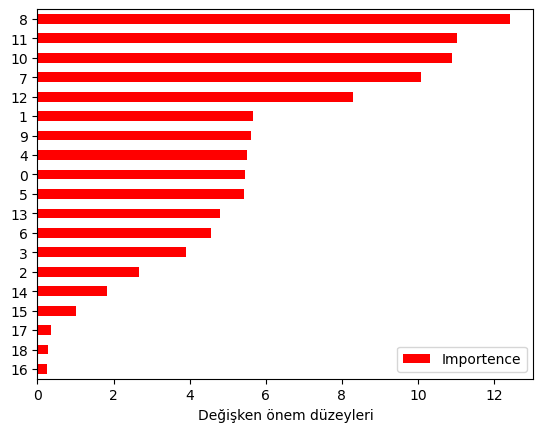

In [393]:
Importance.sort_values(by = "Importence", axis = 0, ascending=True).plot(kind= "barh", color="r")
plt.xlabel("Değişken önem düzeyleri")

##  Gradient Boosting Machines (GBM)

In [395]:
from sklearn.ensemble import GradientBoostingRegressor

In [397]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train,y_train)

GradientBoostingRegressor()

### Tahmin ve Model Tuning

In [398]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

359.13631987833844

In [403]:
gbm_params = {"learning_rate": [0.001, 0.01, 0.1, 2],
             "max_depth": [3,5,8,50,100],
             "n_estimators": [200,500,1000,2000],
             "subsample":[1,0.5,0.75]}

In [ ]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params,cv=10, n_jobs=-1,verbose = 2) ## Dont drop njob parameter. if you'll drop you can wait for years :)
gbm_cv_model.fit(X_train,y_train)

In [ ]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.1,
                                     max_depth=5,
                                     n_estimators=200,
                                     subsample=0.5)
gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

##  XGBoost 

In [404]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [405]:
#!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/43/80/0b5a2dfcf5b4da27b0b68d2833f05d77e1a374d43db951fca200a1f12a52/xgboost-2.1.4-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.1/124.9 MB 573.4 kB/s eta 0:03:38
   ---------------------------------------- 0.1/124.9 MB 774.0 kB/s eta 0:02:42
   ---------------------------------------- 0.3/124.9 MB 1.2 MB/s eta 0:01:47
   ---------------------------------------- 0.5/124.9 MB 2.0 MB/s eta 0:01:04
   ---------------------------------------- 1.0/124.9 MB 3.3 MB/s eta 0:00:38
   ---------------------------------------- 1.5/124.9 MB 4.1 MB/s eta 0:00:31
    --------------------------

In [406]:
import xgboost as xgb

In [407]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [408]:
from xgboost import XGBRegressor

In [409]:
xgb_model = XGBRegressor().fit(X_train, y_train)

### Tahmin ve Model Tuning

In [410]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

366.3863437634965

In [411]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [412]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [413]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 100}

In [430]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.4, 
                         learning_rate = 0.1, 
                         max_depth = 6, 
                         n_estimators = 100) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [431]:
y_pred = xgb_tuned.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_score(y_test,y_pred)

343.6101991802883


0.454590560982185

## Light GBM

In [432]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [433]:
#!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/5e/23/f8b28ca248bb629b9e08f877dd2965d1994e1674a03d67cd10c5246da248/lightgbm-4.6.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB 487.6 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.5 MB 1.2 MB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.5 MB 1.9 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.5 MB 2.2 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.5 MB 2.4 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 2.6 MB/s eta 0:00:01
   ------------------------- -------------- 0.9/1.5 MB 2.6 MB/s eta 0:00:01
   ----------------------------- ---------- 1.1/1.5 MB 2.7 MB/s eta 0:00:01
   --------------------------------- ------ 1

In [434]:
from lightgbm import LGBMRegressor

In [ ]:
#conda install -c conda-forge lightgbm

In [435]:
from lightgbm import LGBMRegressor

In [436]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

### Tahmin ve Model Tuning

In [437]:
y_pred = lgbm_model.predict(X_test,
                            num_iteration = lgbm_model.best_iteration_)

In [438]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

In [439]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [440]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [441]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 20}

In [443]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1,
                           max_depth = 6,
                           n_estimators = 20,
                          colsample_bytree = 0.5)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [444]:
y_pred = lgbm_tuned.predict(X_test)

In [445]:
np.sqrt(mean_squared_error(y_test, y_pred))

375.6085209015434

## CatBoost

In [446]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)


In [447]:
#!pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/1c/e1/78e635a1e5f0066bd02a1ecfd658ad09fe30d275c65c2d0dd76fe253e648/catboost-1.2.7-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB 330.3 kB/s eta 0:05:08
   ---------------------------------------- 0.1/101.7 MB 469.7 kB/s eta 0:03:37
   ---------------------------------------- 0.1/101.7 MB 722.1 kB/s eta 0:02:21
   ---------------------------------------- 0.3/101.7 MB 1.2 MB/s eta 0:01:24
   ---------------------------------------- 0.4/101.7 MB 1.6 MB/s eta 0:01:04
   ---------------------------------------- 0.6/10

In [448]:
from catboost import CatBoostRegressor

In [449]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 142ms	remaining: 2m 22s
1:	learn: 431.3923642	total: 146ms	remaining: 1m 12s
2:	learn: 424.8820360	total: 150ms	remaining: 49.7s
3:	learn: 418.2514904	total: 152ms	remaining: 38s
4:	learn: 412.6394021	total: 155ms	remaining: 30.8s
5:	learn: 406.6247020	total: 157ms	remaining: 26s
6:	learn: 400.5321206	total: 158ms	remaining: 22.5s
7:	learn: 394.6683437	total: 160ms	remaining: 19.8s
8:	learn: 388.2496484	total: 162ms	remaining: 17.8s
9:	learn: 382.9448842	total: 164ms	remaining: 16.2s
10:	learn: 377.2600080	total: 165ms	remaining: 14.9s
11:	learn: 372.4829606	total: 167ms	remaining: 13.8s
12:	learn: 366.6823437	total: 169ms	remaining: 12.8s
13:	learn: 362.6076230	total: 170ms	remaining: 12s
14:	learn: 358.0107745	total: 172ms	remaining: 11.3s
15:	learn: 353.2802665	total: 173ms	remaining: 10.7s
16:	learn: 348.5646265	total: 175ms	remaining: 10.1s
17:	learn: 343.6407912	total: 178ms	remaining: 9.69s
18:	learn: 339.2363847	total: 

### Tahmin ve Model Tuning

In [450]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

351.194631344607

In [451]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [452]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [453]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


KeyboardInterrupt: 

In [454]:
catb_cv_model.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
catb_tuned = CatBoostRegressor(iterations = 200,
                               learning_rate = 0.01,
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))